In [21]:
from transpile_benchy.interface import QASMBench

qasm_bench = QASMBench(size="medium")

from transpile_benchy.metrics import DepthMetric

depth_metric = DepthMetric()

from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap.from_grid(5, 6)

from virtual_swap.pass_managers import SabreCNSV2, SabreQiskit

[autoreload of virtual_swap.pass_managers failed: Traceback (most recent call last):
  File "/home/evm9/virtual-swap/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/home/evm9/virtual-swap/.venv/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/home/evm9/virtual-swap/src/virtual_swap/pass_managers.py", line 7, in <module>
    from qiskit.transpiler.passes import (
ImportError: cannot import name 'RootiSwapWeylDecomposition' from 'qiskit.transpiler.passes' (/home/evm9/virtual-swap/.venv/lib/python3.9/site-pack

In [22]:
import logging
from transpile_benchy.benchmark import Benchmark

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
transpile_benchy_logger.setLevel(logging.INFO)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

benchmark = Benchmark(
    transpilers=[
        SabreCNSV2(coupling_map, logger=transpile_benchy_logger),
        SabreQiskit(coupling_map),
    ],
    submodules=[qasm_bench],
    metrics=[depth_metric],
    logger=transpile_benchy_logger,
    num_runs=10,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Running circuits for QASMBench:   0%|          | 0/20 [00:00<?, ?it/s]INFO:transpile_benchy:Accepted CNS subs: 27
INFO:transpile_benchy:Accepted CNS subs: 26
INFO:transpile_benchy:Accepted CNS subs: 21
INFO:transpile_benchy:Accepted CNS subs: 28
INFO:transpile_benchy:Accepted CNS subs: 31
INFO:transpile_benchy:Accepted CNS subs: 26
INFO:transpile_benchy:Accepted CNS subs: 21
INFO:transpile_benchy:Accepted CNS subs: 27
INFO:transpile_benchy:Accepted CNS subs: 23
INFO:transpile_benchy:Accepted CNS subs: 19
Running circuits for QASMBench:   5%|▌         | 1/20 [00:07<02:29,  7.86s/it]INFO:transpile_benchy:Accepted CNS subs: 3
INFO:transpile_benchy:Accepted CNS subs: 5
INFO:transpile_benchy:Accepted CNS subs: 2
INFO:transpile_benchy:Accepted CNS subs: 0
INFO:transpile_benchy:Accepted CNS subs: 5
INFO:transpile_benchy:Accepted CNS subs: 4
INFO:transpile_benchy:Accepted CNS subs: 6
INFO:transpile_benchy:Accepted CNS subs: 5
INFO:transp

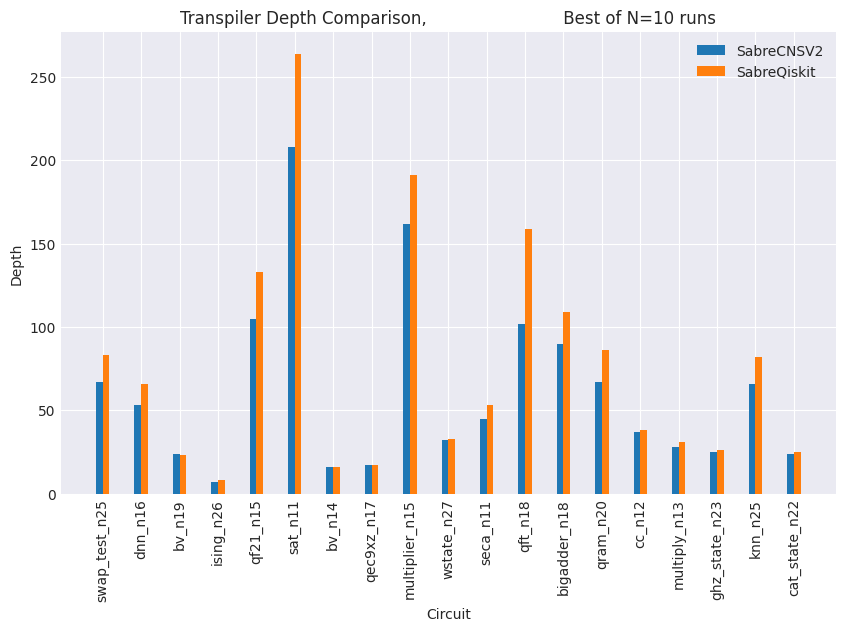

In [25]:
benchmark.plot()

In [24]:
benchmark.results

{'Depth': {'swap_test_n25': {'SabreCNSV2': 67, 'SabreQiskit': 83},
  'dnn_n16': {'SabreCNSV2': 53, 'SabreQiskit': 66},
  'bv_n19': {'SabreCNSV2': 24, 'SabreQiskit': 23},
  'ising_n26': {'SabreCNSV2': 7, 'SabreQiskit': 8},
  'qf21_n15': {'SabreCNSV2': 105, 'SabreQiskit': 133},
  'sat_n11': {'SabreCNSV2': 208, 'SabreQiskit': 264},
  'bv_n14': {'SabreCNSV2': 16, 'SabreQiskit': 16},
  'qec9xz_n17': {'SabreCNSV2': 17, 'SabreQiskit': 17},
  'multiplier_n15': {'SabreCNSV2': 162, 'SabreQiskit': 191},
  'wstate_n27': {'SabreCNSV2': 32, 'SabreQiskit': 33},
  'seca_n11': {'SabreCNSV2': 45, 'SabreQiskit': 53},
  'qft_n18': {'SabreCNSV2': 102, 'SabreQiskit': 159},
  'bigadder_n18': {'SabreCNSV2': 90, 'SabreQiskit': 109},
  'qram_n20': {'SabreCNSV2': 67, 'SabreQiskit': 86},
  'cc_n12': {'SabreCNSV2': 37, 'SabreQiskit': 38},
  'multiply_n13': {'SabreCNSV2': 28, 'SabreQiskit': 31},
  'ghz_state_n23': {'SabreCNSV2': 25, 'SabreQiskit': 26},
  'knn_n25': {'SabreCNSV2': 66, 'SabreQiskit': 82},
  'cat_stat

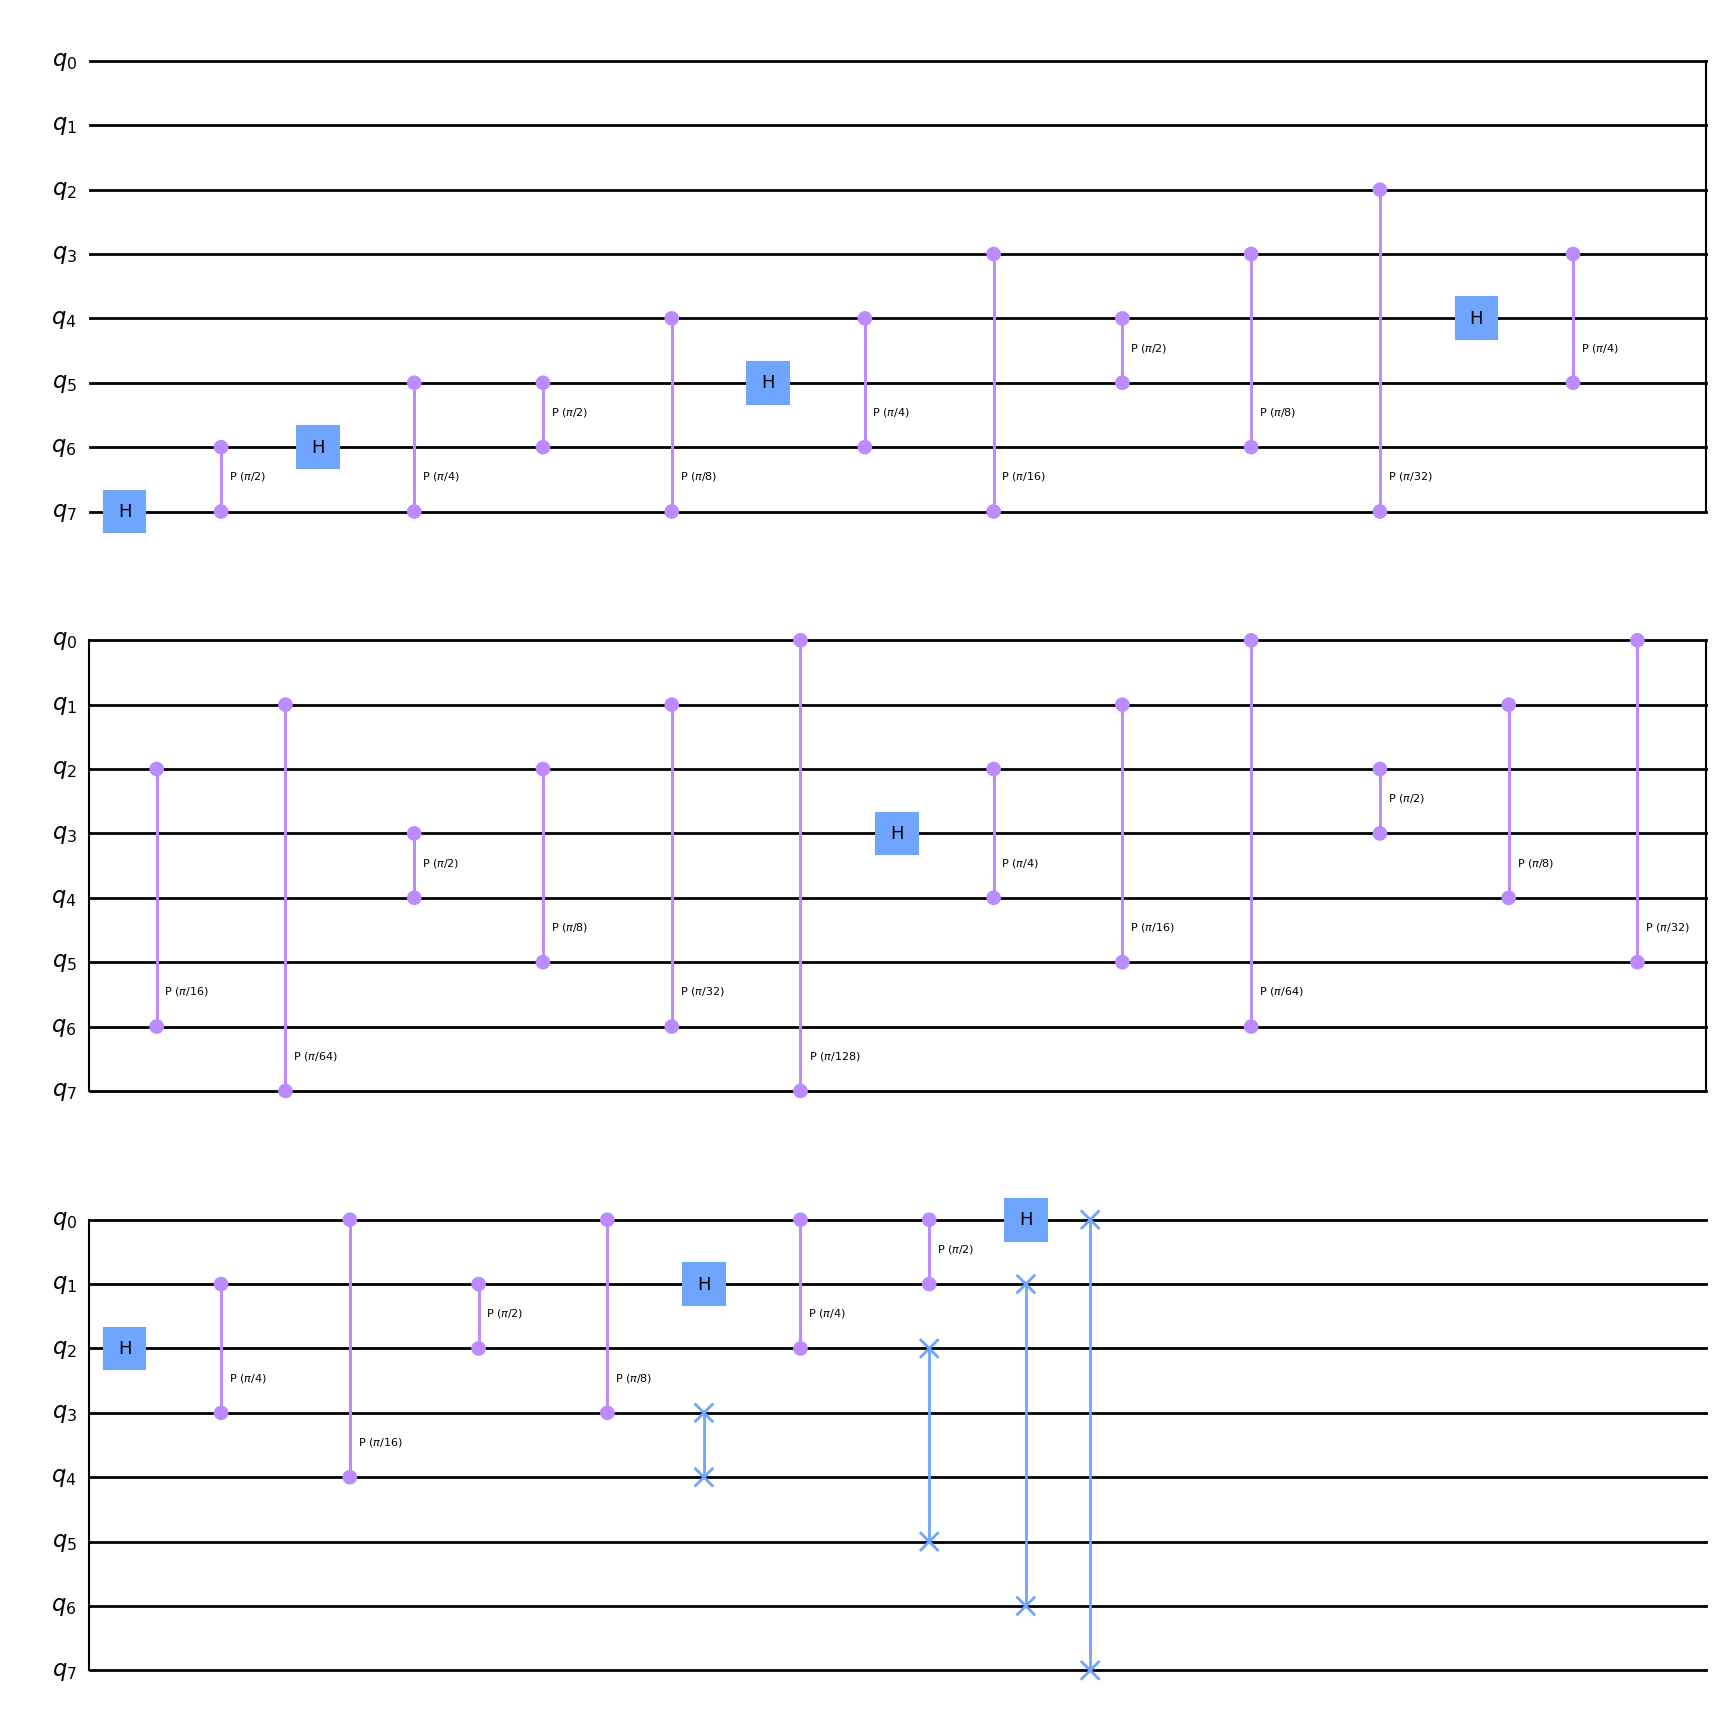

In [11]:
from qiskit.circuit.library import QFT

qc = QFT(8)
qc.decompose().draw(output="mpl")

71


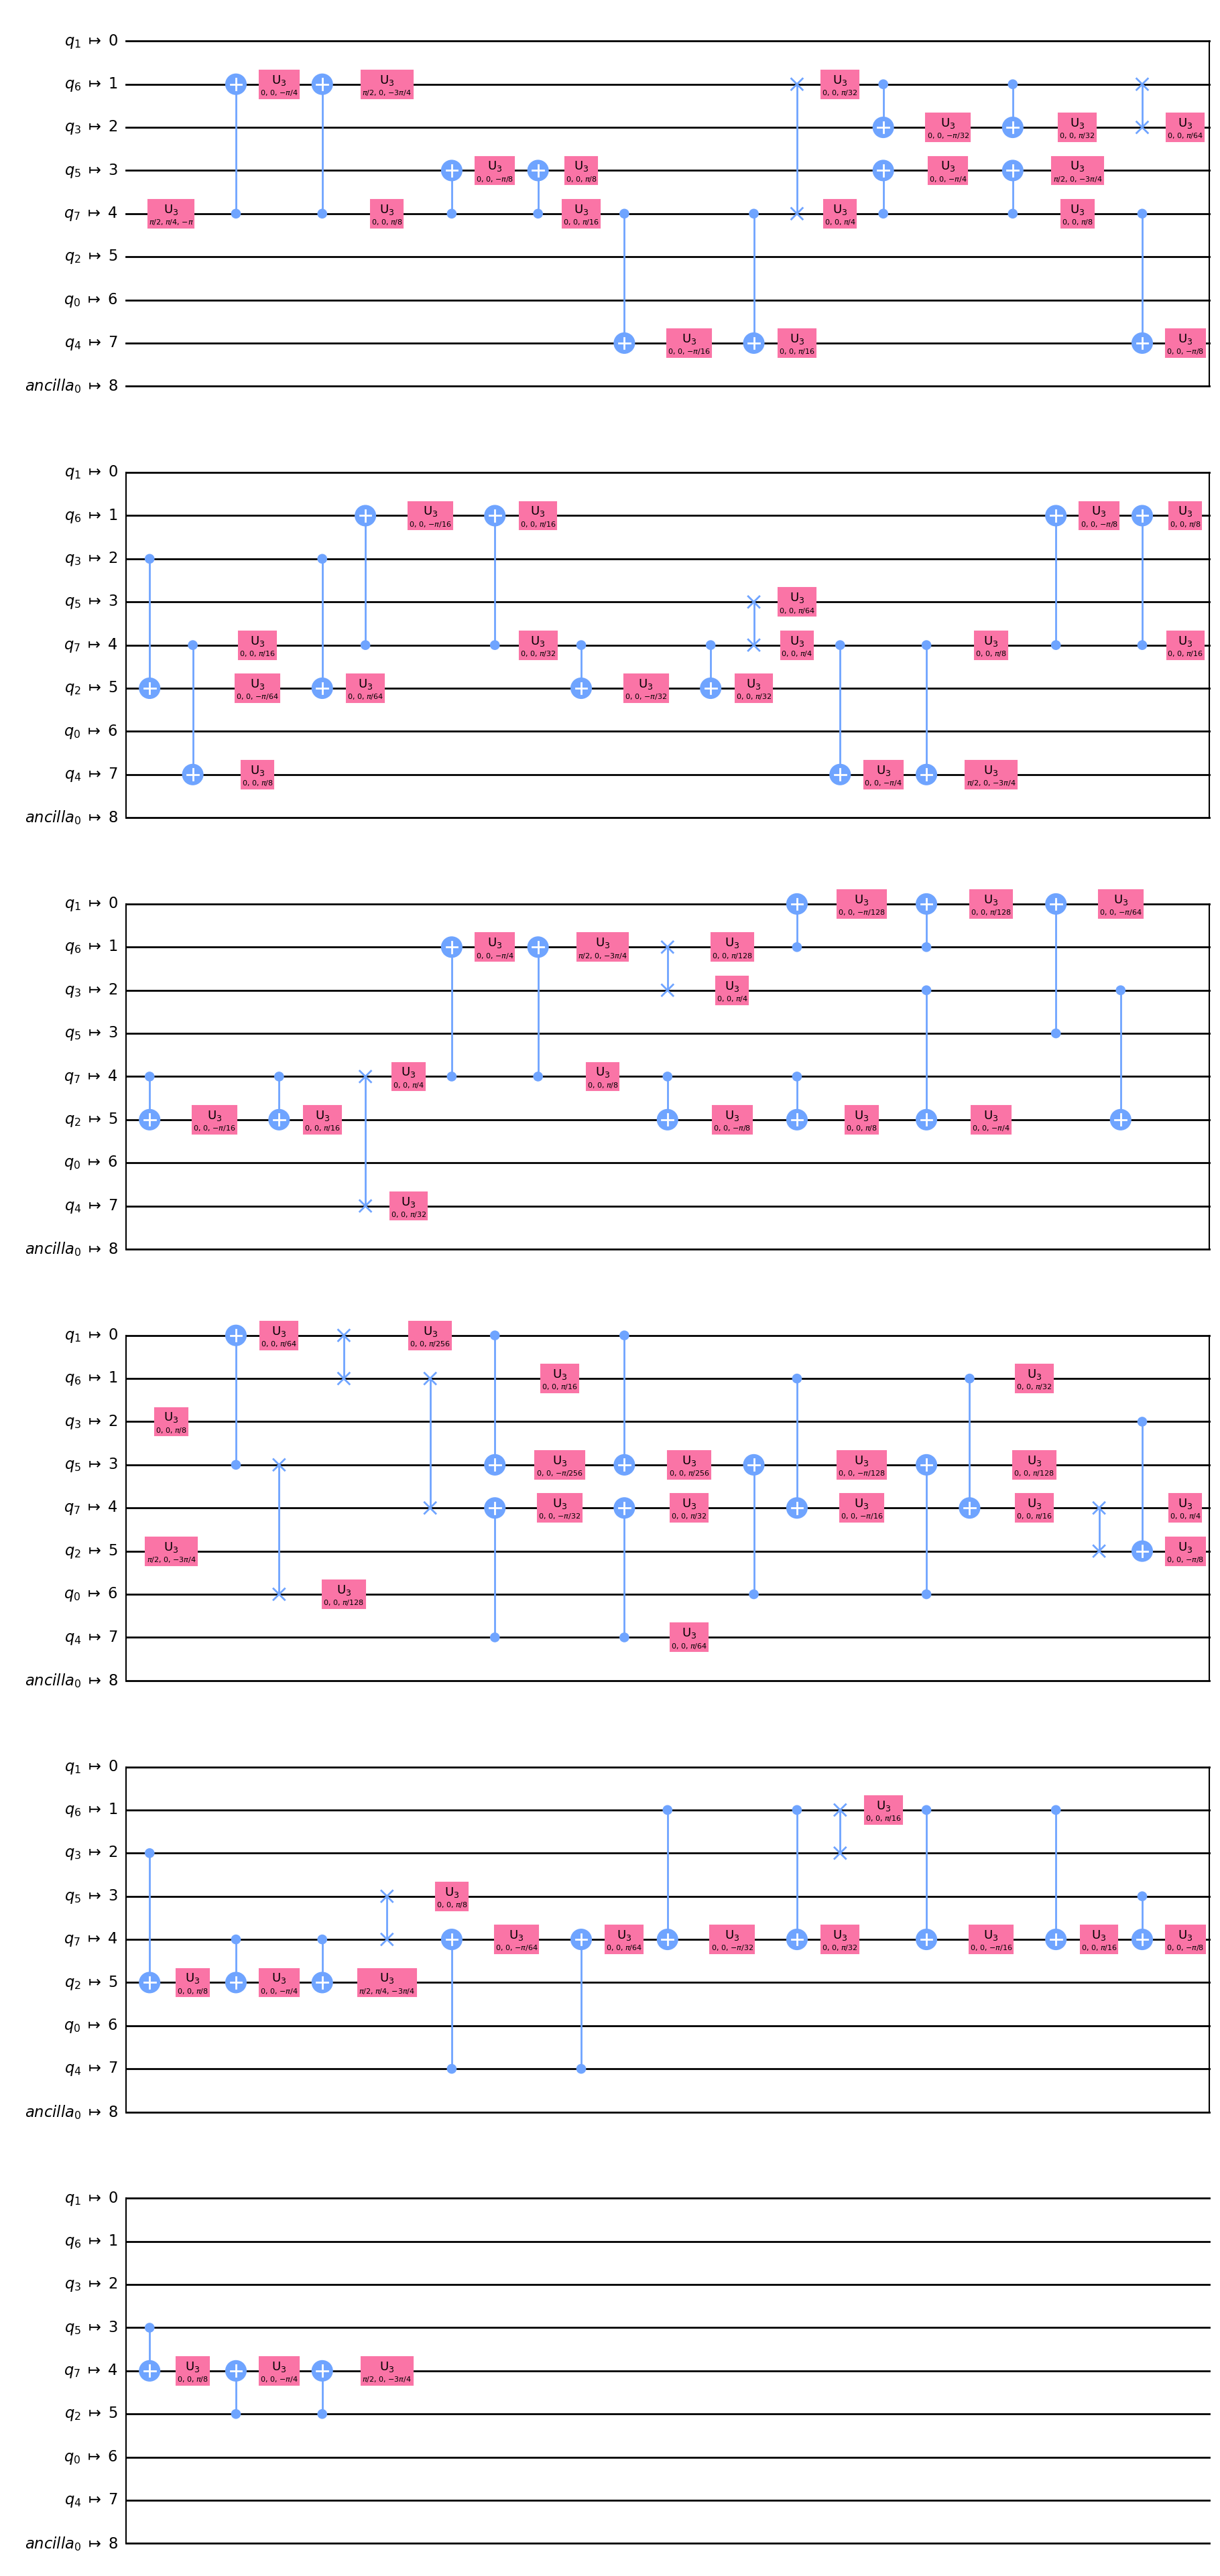

In [19]:
from qiskit import transpile

coupling_map = CouplingMap.from_grid(3, 3)

transp = transpile(
    qc,
    coupling_map=coupling_map,
    basis_gates=["cx", "u3", "swap"],
    optimization_level=3,
)
from qiskit.transpiler.passmanager import PassManager
from qiskit.transpiler.passes import (
    OptimizeSwapBeforeMeasure,
    Collect2qBlocks,
    ConsolidateBlocks,
    Optimize1qGates,
)
from slam.utils.transpiler_pass.weyl_decompose import RootiSwapWeylDecomposition

# convert to sqsiswap
pm = PassManager()
pm.append(
    [
        OptimizeSwapBeforeMeasure(),
        Collect2qBlocks(),
        ConsolidateBlocks(force_consolidate=True),
        RootiSwapWeylDecomposition(),
        Optimize1qGates(basis=["u", "cx", "iswap", "swap"]),
    ]
)
from transpile_benchy.metrics import DepthMetric

transp2 = pm.run(transp)
print(DepthMetric.calculate(transp2))
transp.draw("mpl")

INFO:transpile_benchy:Accepted CNS subs: 21
INFO:transpile_benchy:Accepted CNS subs: 3


41


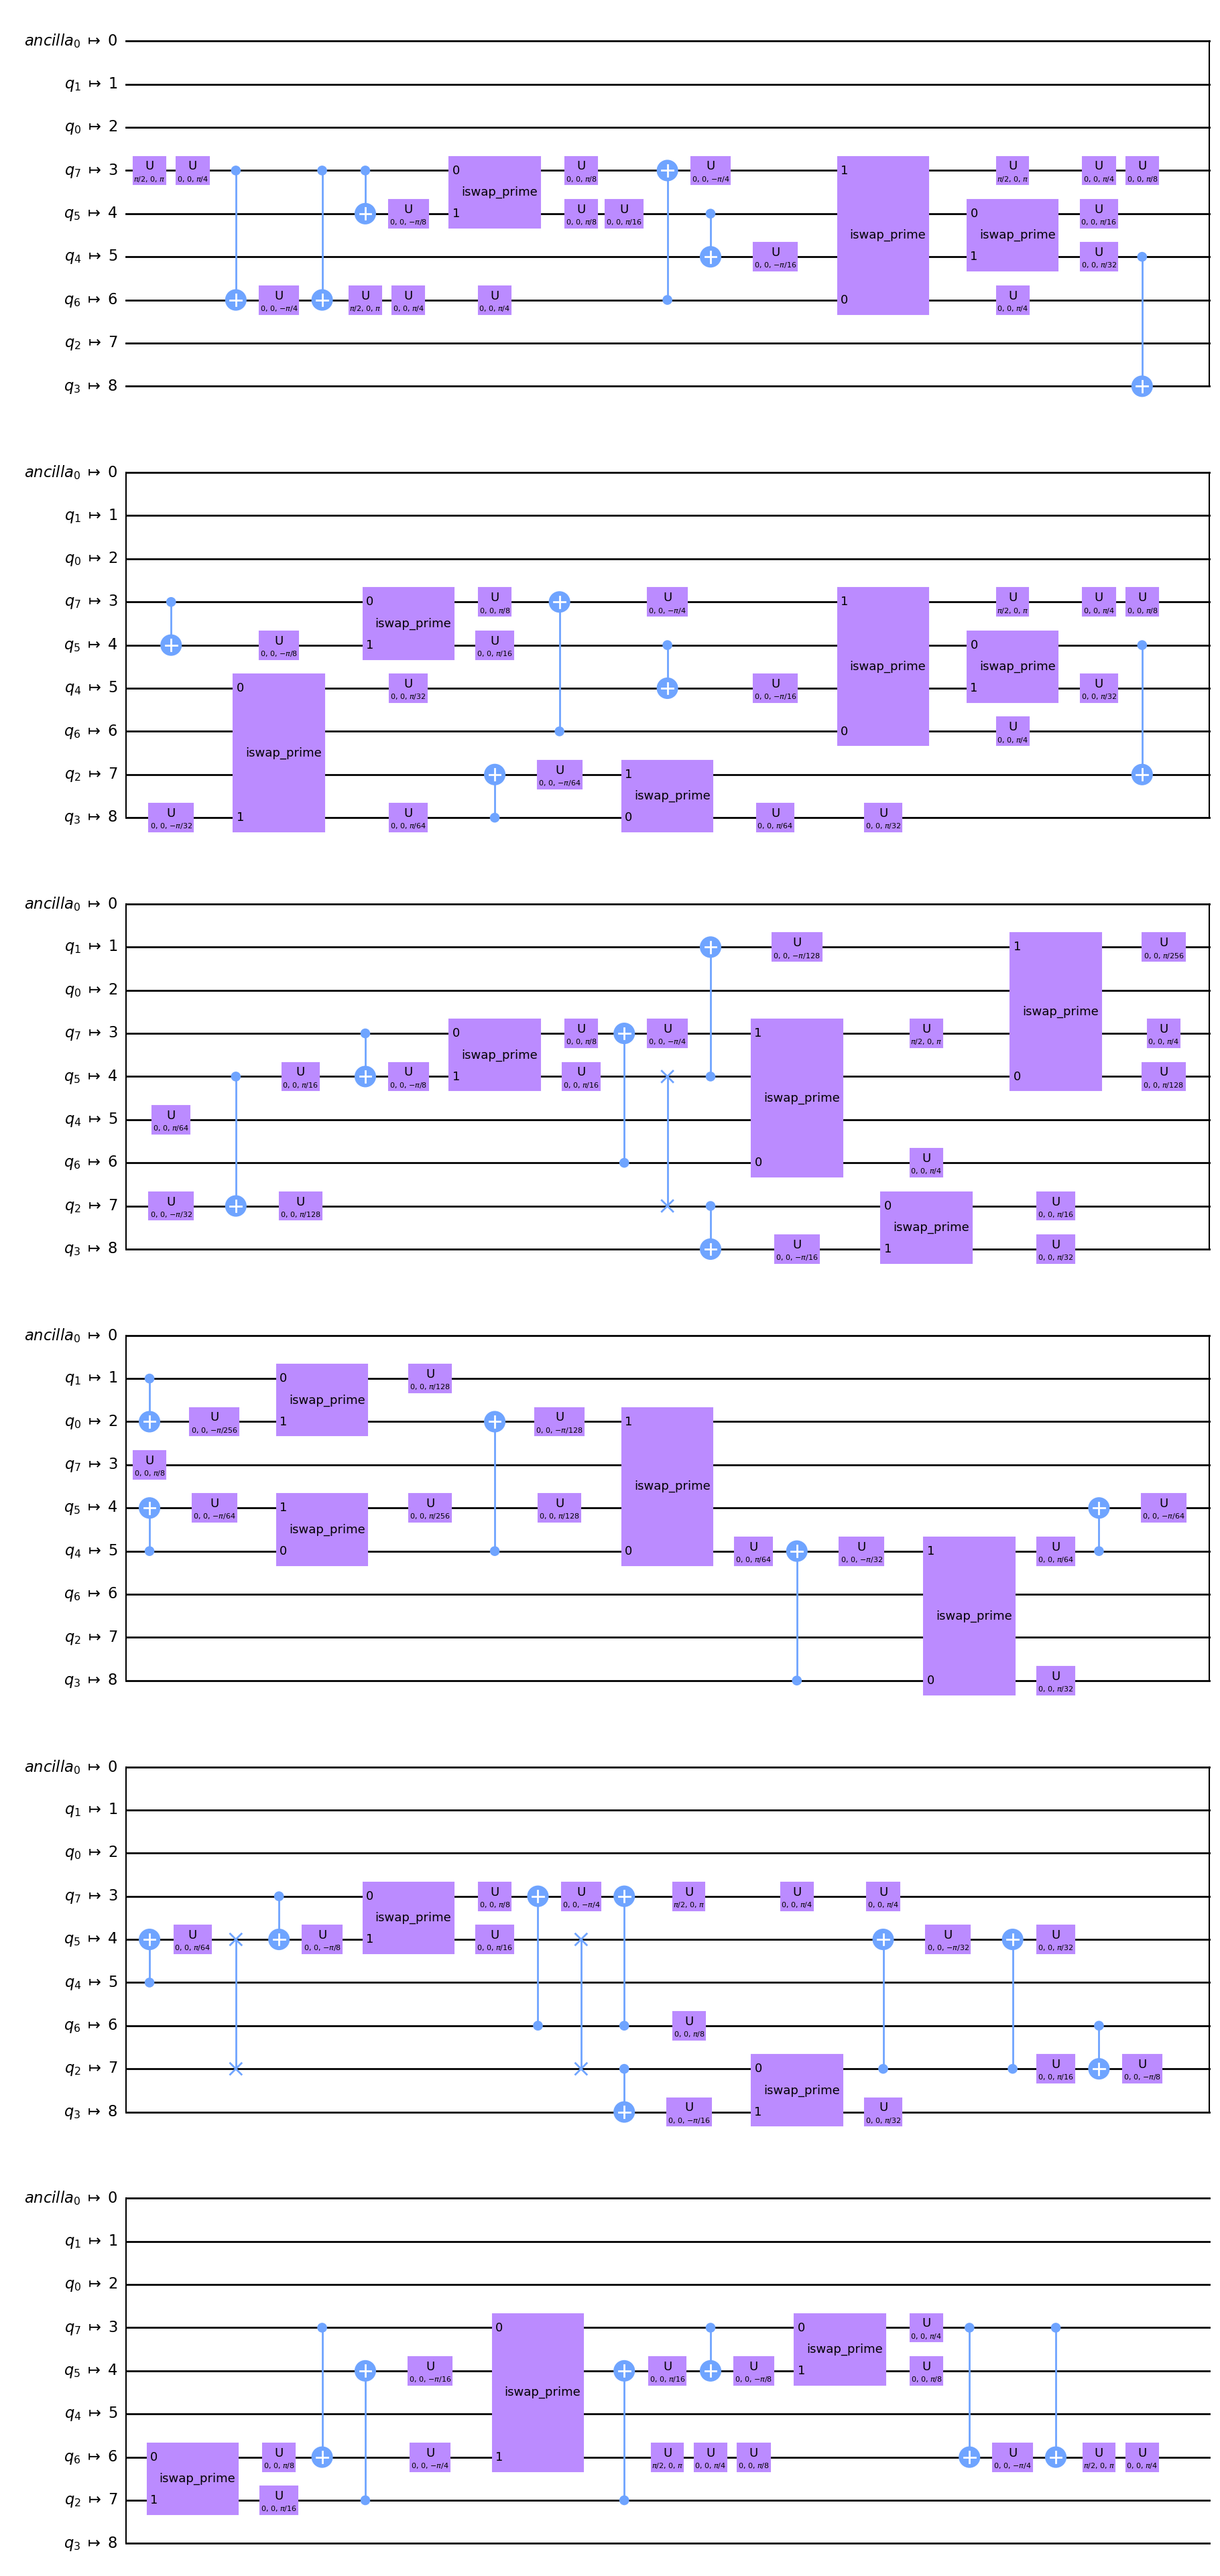

In [20]:
coupling_map = CouplingMap.from_grid(3, 3)
pm = SabreCNSV2(coupling_map, logger=transpile_benchy_logger)
# build a QFT circuit
transp = pm.run(qc)
from transpile_benchy.metrics import DepthMetric

transp2 = pm.run(transp)
print(DepthMetric.calculate(transp2))
transp.draw("mpl")